In [47]:
import pandas as pd # to work with dataframes, manipulate data (panel data)
import matplotlib.pyplot as plt # viz library
import seaborn as sns # HD viz library
import numpy as np # to work with numbers (numerical python)
import scipy.stats as stats


pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv("/Users/davidthrien/Documents/Ironhack/Ironhack_labs/Week2/amz_uk_price_prediction_dataset.csv")
df = data.copy()

In [6]:
#Part1 1. Frequency Tables
df.head(10)
df.tail(5)
df.sample(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1741941,1963227,B091123DBY,Mounted or framed photograph by Andrew Ray fea...,0.0,0,13.50,False,0,Handmade Baby Products
1001486,1108126,B08DPYJY4Y,Starry Night Art Print | A4| LIMITED TIME Prom...,0.0,0,3.99,False,0,Handmade Artwork
2275824,2628013,B0B48V28PZ,2x 50W Amplifier Bluetooth-compatible 5.0 12V ...,5.0,1,14.80,False,0,Hi-Fi Receivers & Separates
2357941,2717273,B0C5WVLKZX,"QSRTHFV Solar String Lights Outdoor,12LED Mult...",0.0,0,4.99,False,0,String Lights
2043812,2308333,B0CDGK6Z2F,Garment Bag Suit Travel Men's Shirt Fashion Sh...,0.0,0,15.67,False,0,Sports & Outdoors
1392464,1532871,B0CKCQVJ3R,FOLOSAFENAR Tablet Chatting Three Card Slots H...,0.0,0,62.39,False,0,Tablets
1905552,2137183,B0CH3PV68G,16 x 7 Pressure Treated Tongue And Groove Apex...,0.0,0,5566.37,False,0,Garden Storage & Housing
941463,1026274,B0C9LN859T,CJQJPNZ Leisure Fishing Vest with Large Pocket...,0.0,0,80.88,False,0,Sports & Outdoors
2007788,2259091,B0B9KGKXSX,"WalkingPad R1 Pro Folding Treadmill, 2 in 1 Wa...",4.3,112,549.00,False,0,Sports & Outdoors
664401,713762,B0CDX7MMMF,Otueidnsy Fill Light for Mobile Professional R...,0.0,0,12.55,False,0,Flashes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [8]:
df.shape

(2443651, 9)

In [9]:
df.eq(" ").sum()


uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [10]:
df.isna().sum()


uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [11]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [12]:
cat = df.select_dtypes(exclude="number")
cat

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers
...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",False,Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,False,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,False,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,False,Motorbike Clothing


In [13]:
frequency_table = cat["category"].value_counts()
frequency_table_top5 = frequency_table[0:5]
print(frequency_table_top5)
proportion_table = cat["category"].value_counts(normalize=True).round(2)
proportion_table_top5 = proportion_table[0:5]
print(proportion_table_top5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64
category
Sports & Outdoors                         0.34
Beauty                                    0.01
Handmade Clothing, Shoes & Accessories    0.01
Bath & Body                               0.01
Birthday Gifts                            0.01
Name: proportion, dtype: float64


In [14]:
df2 = pd.concat([frequency_table_top5, proportion_table_top5], axis=1)
df2.columns = ['absolute_frequency', 'relative_frequency']
df2

,absolute_frequency,relative_frequency
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01


In [15]:
total_absolute = frequency_table_top5.sum()
total_relative = proportion_table_top5.sum()

total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row

,absolute_frequency,relative_frequency
Total,912876,0.38


In [16]:
df3 = pd.concat([df2,total_row], axis=0)
df3

,absolute_frequency,relative_frequency
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
Total,912876,0.38


/var/folders/1m/50y9vknn1lx05wgwhbgqtdh80000gn/T/ipykernel_80106/2905526549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


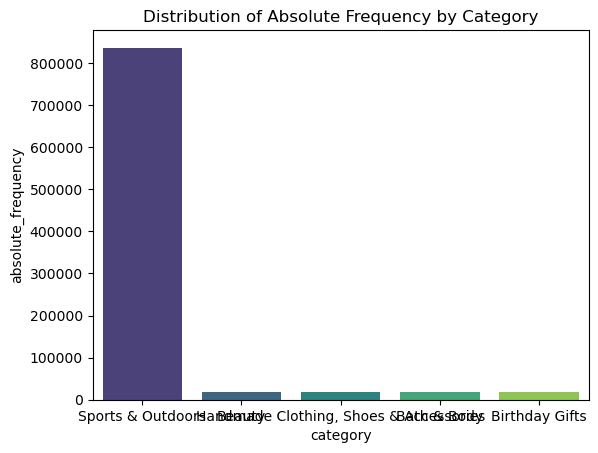

In [17]:
#Part1 2. Visualizations
sns.barplot(
    x='category',
    y='absolute_frequency',
    data=df2,
    palette='viridis',
)
plt.title('Distribution of Absolute Frequency by Category')
plt.show()


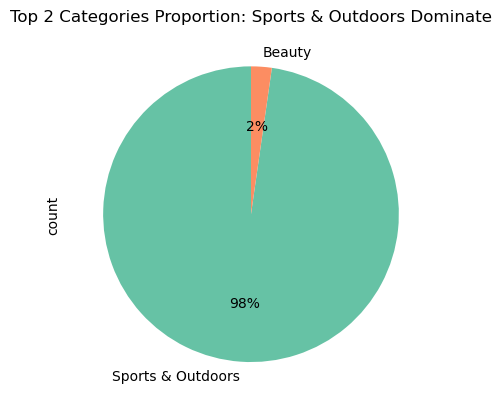

In [18]:
frequency_table_top2 = frequency_table[0:2]
frequency_table_top2.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.title('Top 2 Categories Proportion: Sports & Outdoors Dominate')
plt.show()
# Sports & Outdoors dominate the listings by far

In [19]:
#Part2: 1. Measures of Centrality
print(df["price"].mean().round(2))
print(df["price"].median())
print(df["price"].mode())
#the average price is much higher than the mode




89.24
19.09
0    9.99
Name: price, dtype: float64


In [20]:
#Part2 2.Measures of Dispersion
print(df["price"].var())
print(df["price"].std())
print(df["price"].max()-df["price"].min())


Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df["price"].skew().round(2)

#the measures of dispersion show that there are significant outliers on the higher side of prices

119445.48532256528
345.60886175352226
100000.0
36.0


27.49

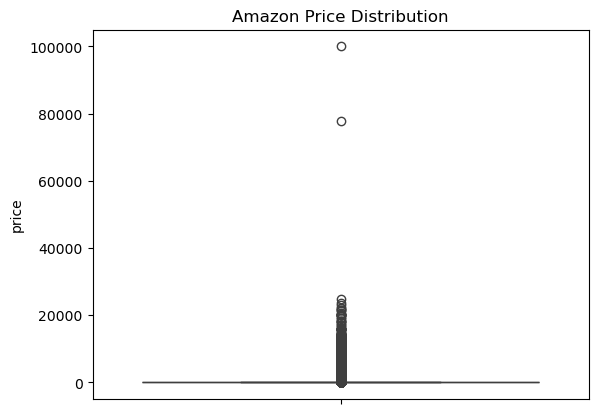

In [21]:
sns.boxplot(data=df.price)
plt.title('Amazon Price Distribution')
plt.show()

In [22]:
#Part3 1.Measure of Centrality
df_review = df[df["reviews"] != 0]

df_review.sample(30)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2026467,2283128,B086QZK6S6,Chin up Bar Storage Pull up Bar Rack Exercise ...,2.3,5,4.32,False,0,Sports & Outdoors
1592038,1793009,B07C19DYRN,Bubblegum Strong Scented Reed Diffuser Refill ...,5.0,1,7.99,False,0,Handmade Home Décor
1852181,2081047,B0095GIMVE,Beiersdorf Eucerin Aquaphor Soothing Skin,4.7,791,9.20,False,400,Beauty
32026,34446,B00DDUWI54,Ironmongery World 10 x Picture Rail Moulding H...,4.5,230,3.90,False,0,Hardware
300863,318860,B01N33LS7H,Hape E3751 Cogwheel Railway Engine - Wooden Tr...,4.5,62,17.04,False,0,Kids' Play Vehicles
1644981,1851363,B01MZ79U8E,Sunglasses,4.4,2240,88.00,False,0,Men
545342,588048,B084L26TQJ,Gamer Gear 128MB High Speed Memory Card for So...,4.5,1282,6.99,False,300,PC & Video Games
2194048,2540023,B0967ZQQG4,Superhero Balloons Superhero Party Decoration ...,4.4,237,12.99,False,100,Arts & Crafts
1802854,2027780,B0BF657ZQD,SUPVOX Microphone Stand Tray Clamp On Music St...,4.2,6,15.59,False,0,DJ & VJ Equipment
1357475,1496495,B0B5GPZBCJ,Bud Duck Mini Deluxe Bride & Groom Ducks Colle...,3.0,2,19.99,False,0,Baby & Toddler Toys


In [23]:
print(df_review["stars"].mean().round(2))
print(df_review["stars"].median())
print(df_review["stars"].mode())
#customers ususally rate products quite positiv

4.32
4.4
0    4.5
Name: stars, dtype: float64


In [24]:
#Part3 2.Measures of Dispersion
print(df_review["stars"].var())
print(df_review["stars"].std())
print(df_review["stars"].max()-df_review["stars"].min())


Q1 = df_review["stars"].quantile(0.25)
Q3 = df_review["stars"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# while the range is big, the standard deviation and iqr is narrow

0.3083433752380519
0.5552867504614637
4.0
0.5


In [25]:
print(df_review["stars"].skew().round(2))
df_review["stars"].kurtosis().round(2)

# The positibe kurtosis tells us that the distribution has a higer peak und fatter tails. 
# While the negative skew confirms that we have a concentration in higher ratings, it also shows the outliers on the lower side. 

-2.38


9.78

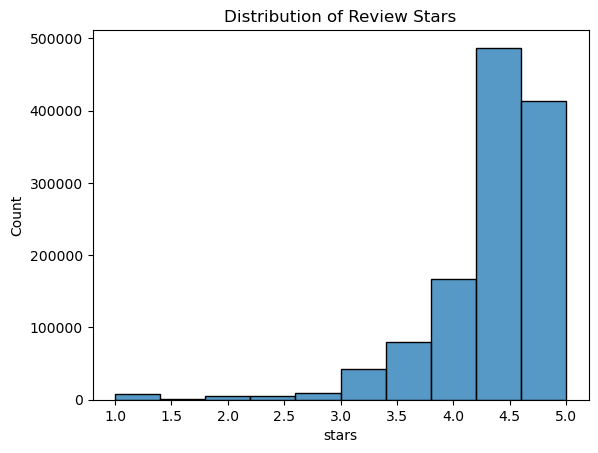

In [26]:
sns.histplot(df_review.stars, bins=10)
plt.title('Distribution of Review Stars')
plt.show()
#ratings around 4.5 are most dominant

Most important findings
-Products in the category Sports & Outdoors dominate the listings by far
-While there most products are in the low price segment, there are few significant outliers in the high price segment
-Most product rating are positiv and show 4-5 stars


Part 2 Bivariate

1.1

In [43]:
crosstab = pd.crosstab(df["category"], df["isBestSeller"])

crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [44]:
crosstab_normalized = pd.crosstab(df["category"], df["isBestSeller"], normalize="index")

crosstab_normalized

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [45]:
crosstab_sorted = crosstab_normalized.sort_values(by=True, ascending=False)
crosstab_sorted

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


1.2

In [57]:
from scipy.stats import chi2_contingency
_, chi2_pvalue, _, _ = chi2_contingency(crosstab)
print(chi2_pvalue)
# Check if the chi2_pvalue is smaller than 0.5
float(chi2_pvalue) < 0.05

0.0


True

# --> significant association

In [59]:
from scipy.stats.contingency import association

association(crosstab, method='cramer')

0.1222829439760564

The Cramer value of 0.122 suggests a **weak** association between the two variables.

1.3.

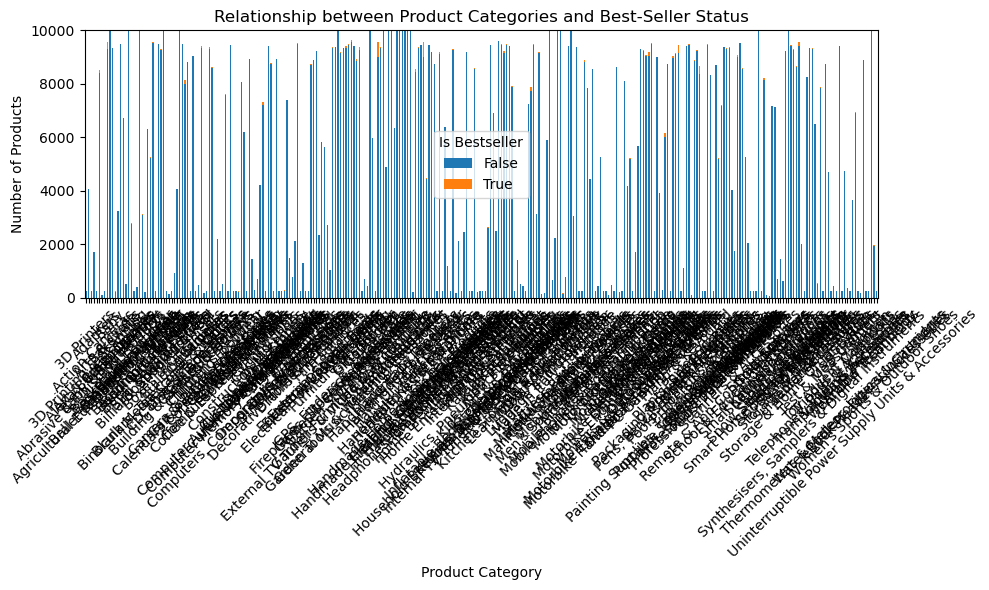

In [69]:

crosstab.plot(kind='bar', stacked=True, figsize=(10, 6),
              color=['#1f77b4', '#ff7f0e'])  # Beispiel für Farbwahl

plt.title('Relationship between Product Categories and Best-Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.legend(title='Is Bestseller')
plt.xticks(rotation=45)  # Rotiert die Kategorienamen für bessere Lesbarkeit
plt.ylim(0, 10000)
plt.tight_layout()

plt.show()

2.0

In [73]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliers.head(1)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


2.1

In [79]:
top_categories = df_no_outliers['category'].value_counts().nlargest(20).index
top_categories

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [80]:
df_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_categories)]


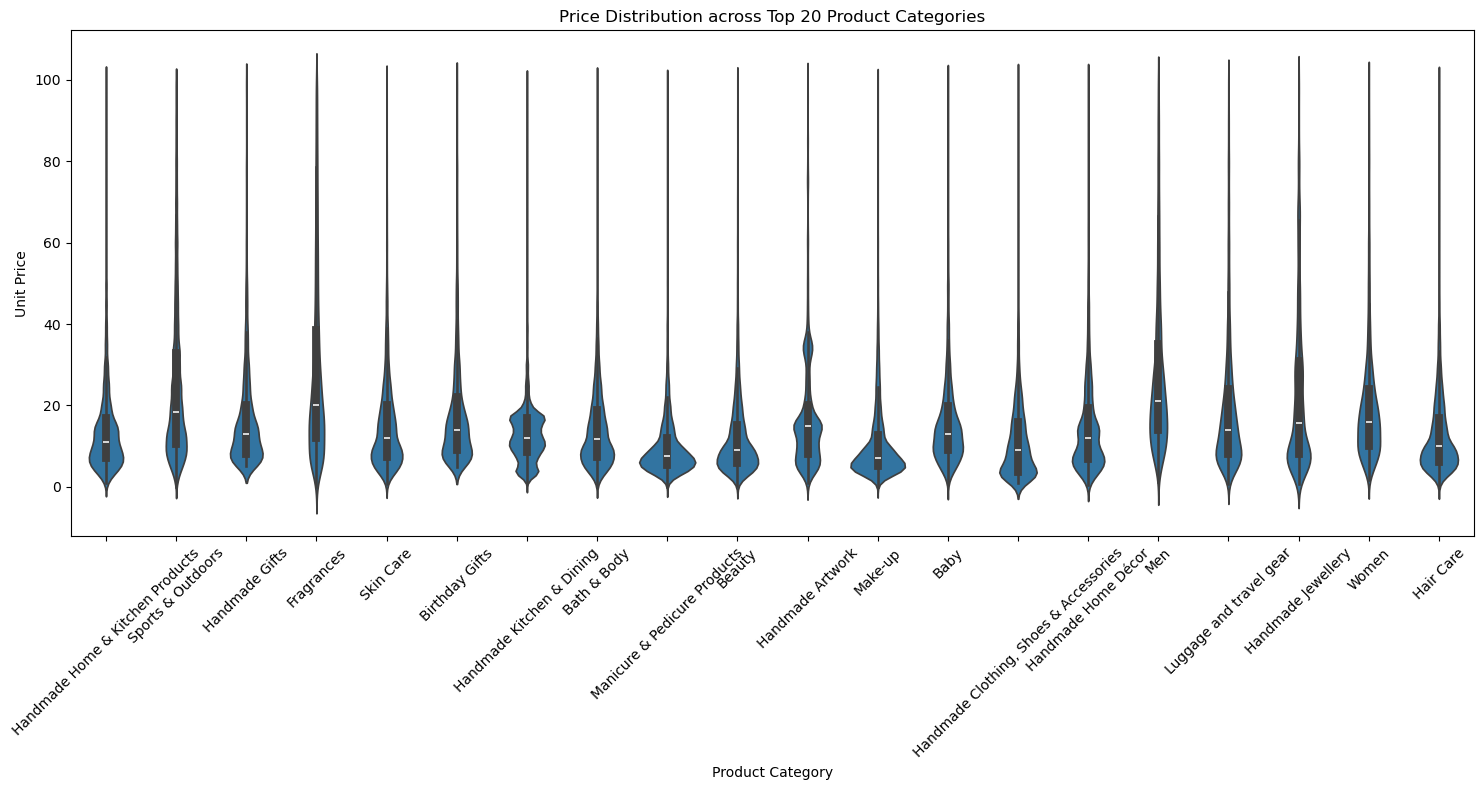

In [81]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=df_top_categories, x='category', y='price')
plt.xticks(rotation=45)
plt.title('Price Distribution across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()

In [83]:
median_price_by_category = df_no_outliers.groupby('category')['price'].median()


highest_median_category = median_price_by_category.sort_values(ascending=False).head(1)
highest_median_category

category
Desktop PCs    74.0
Name: price, dtype: float64

1.2

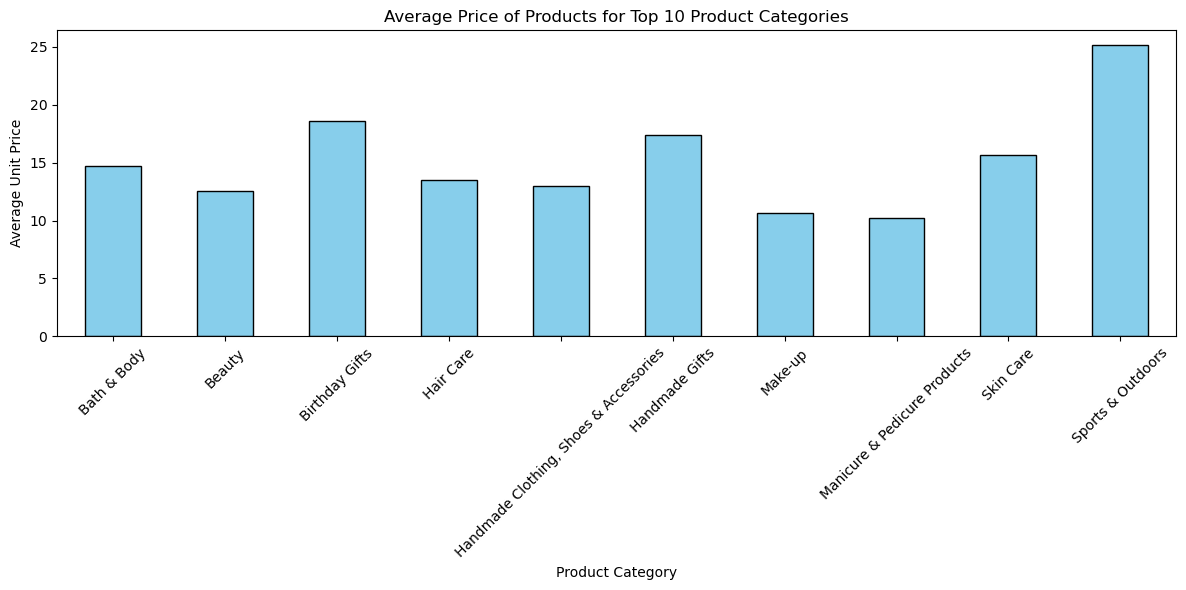

In [ ]:

top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index


average_price_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean()


plt.figure(figsize=(12, 6))
average_price_top_10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [101]:
average_price_all_categories = df_no_outliers.groupby('category')['price'].mean()

highest_average_category = average_price_all_categories.sort_values(ascending=False).head(1)
highest_average_category 

category
Motherboards    68.772432
Name: price, dtype: float64

2.3

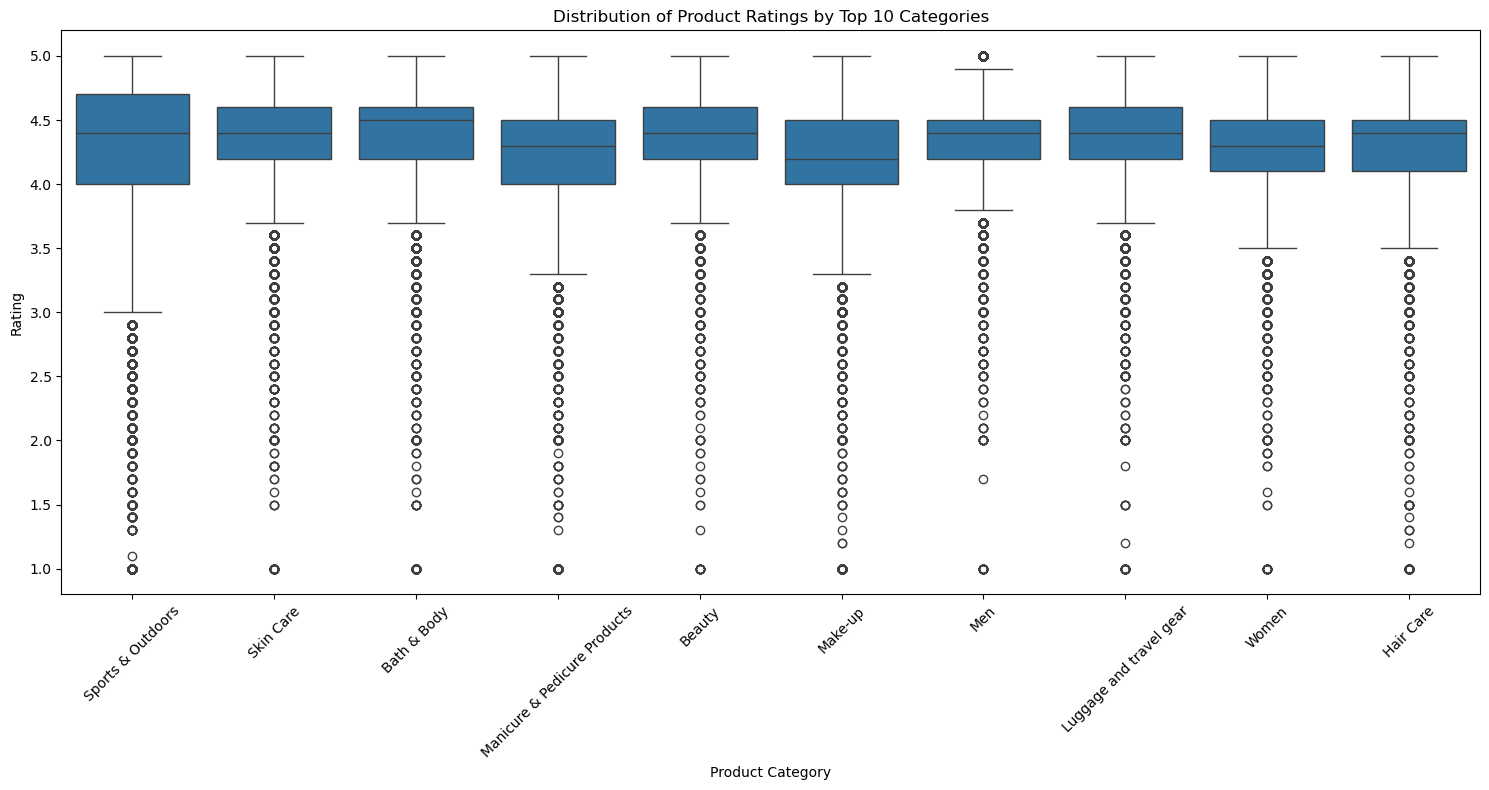

In [ ]:
df_no_outliers_no_review = df_no_outliers[df_no_outliers["reviews"] != 0]
top_10_categories = df_no_outliers_no_review['category'].value_counts().nlargest(10).index


df_top_categories = df_no_outliers_no_review[df_no_outliers_no_review['category'].isin(top_10_categories)]


plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top_categories, x='category', y='stars')
plt.xticks(rotation=45)
plt.title('Distribution of Product Ratings by Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [90]:
median_rating_by_category = df_no_outliers_no_review.groupby('category')['stars'].median()

highest_median_category = median_rating_by_category.sort_values(ascending=False).head(1)
highest_median_category

category
Made in Italy Handmade    5.0
Name: stars, dtype: float64

3.1

In [ ]:
correlation = df_no_outliers_no_review[['price', 'stars']].corr().iloc[0, 1]
correlation
# no, the correlation is very weak, almost 0

0.00674450806716114

3.2

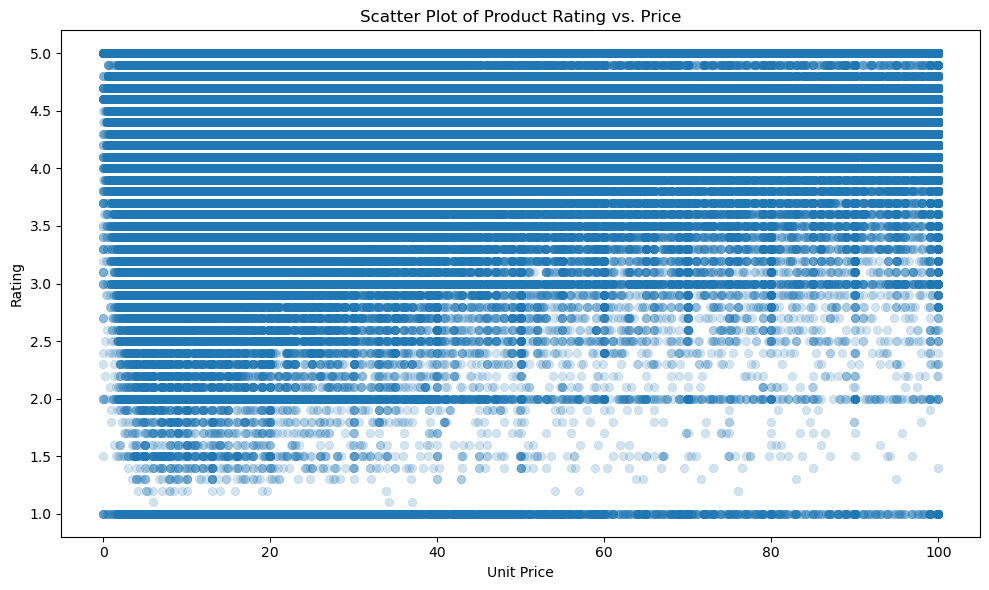

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers_no_review, x='price', y='stars', alpha=0.2, edgecolor=None)
plt.title('Scatter Plot of Product Rating vs. Price')
plt.xlabel('Unit Price')
plt.ylabel('Rating')
plt.tight_layout()

plt.show()

there are less 1,5 - 3 star ratings for higher prices products

In [112]:
num = df_no_outliers_no_review.select_dtypes(include="number")
num2 = num.drop(columns=["uid"])
num2

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443639,3.6,25,49.99,0
2443642,3.6,66,49.99,0
2443644,3.6,12,14.99,0
2443649,4.3,404,79.99,0


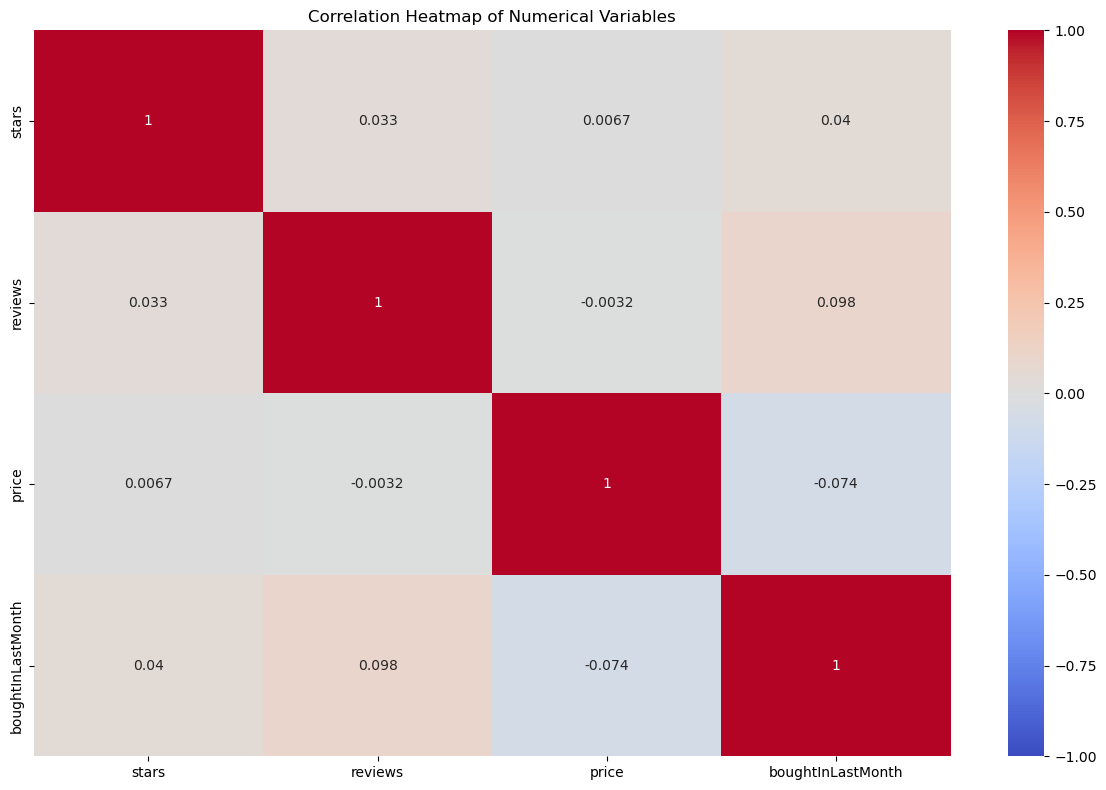

In [113]:
corr = num2.corr()

# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

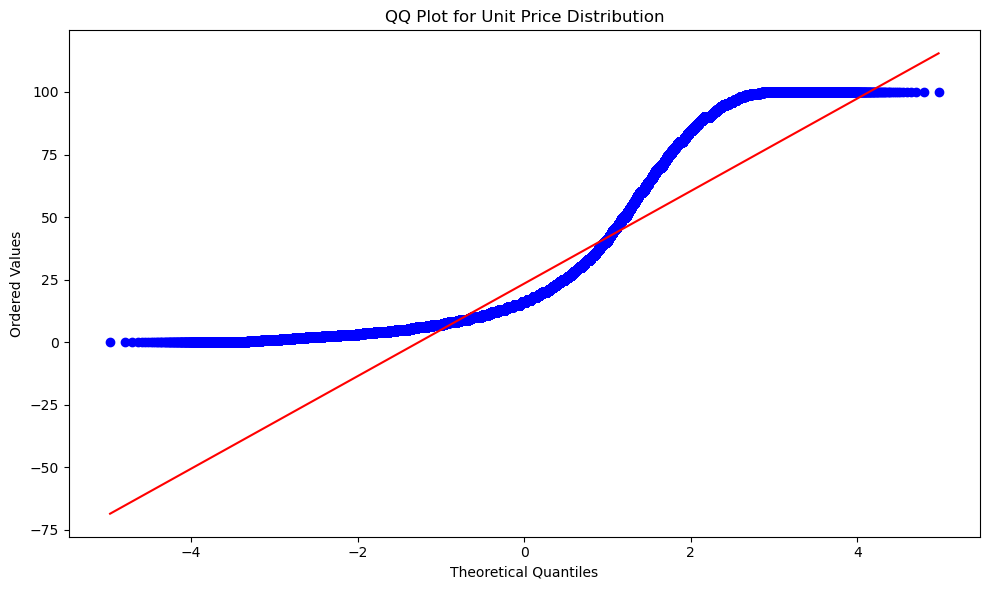

In [114]:
plt.figure(figsize=(10, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Unit Price Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.tight_layout()
plt.show()

product prices do not follow a normal distribution